#📌 Extracción

In [1]:
# Instalar pandas si no está disponible
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import json

# Cargar datos desde el archivo JSON
with open('TelecomX_Data.json', 'r', encoding='utf-8') as file:
    datos_json = json.load(file)

# Mostrar la cantidad de registros cargados
print(f"Datos cargados exitosamente: {len(datos_json)} registros")
print(f"\nEstructura del primer registro:")
print(json.dumps(datos_json[0], indent=2))

Datos cargados exitosamente: 7267 registros

Estructura del primer registro:
{
  "customerID": "0002-ORFBO",
  "Churn": "No",
  "customer": {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "Yes",
    "tenure": 9
  },
  "phone": {
    "PhoneService": "Yes",
    "MultipleLines": "No"
  },
  "internet": {
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "No"
  },
  "account": {
    "Contract": "One year",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Mailed check",
    "Charges": {
      "Monthly": 65.6,
      "Total": "593.3"
    }
  }
}


In [3]:
# Convertir JSON a DataFrame normalizando los datos anidados
df = pd.json_normalize(datos_json)

# Mostrar informacion basica del DataFrame
print(f"Dimensiones del DataFrame: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nColumnas disponibles:")
print(df.columns.tolist())
print(f"\nPrimeros 5 registros:")
df.head()

Dimensiones del DataFrame: 7267 filas x 21 columnas

Columnas disponibles:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']

Primeros 5 registros:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [4]:
# ============================================
# 2.1 Exploracion de la estructura del dataset
# ============================================

# Informacion general del DataFrame
print("INFORMACION GENERAL DEL DATASET")
print("=" * 50)
df.info()

print("\n\nTIPOS DE DATOS POR COLUMNA")
print("=" * 50)
print(df.dtypes)

INFORMACION GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSup

In [5]:
# ============================================
# 2.2 Identificacion de problemas en los datos
# ============================================

# Valores ausentes por columna
print("VALORES AUSENTES POR COLUMNA")
print("=" * 50)
valores_nulos = df.isnull().sum()
print(valores_nulos[valores_nulos > 0] if valores_nulos.sum() > 0 else "No hay valores nulos")

# Valores vacios (strings vacios o espacios)
print("\n\nVALORES VACIOS (STRINGS VACIOS)")
print("=" * 50)
for col in df.select_dtypes(include=['object']).columns:
    vacios = (df[col] == '') | (df[col].str.strip() == '')
    if vacios.sum() > 0:
        print(f"{col}: {vacios.sum()} valores vacios")

# Duplicados
print("\n\nREGISTROS DUPLICADOS")
print("=" * 50)
duplicados = df.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")

# Duplicados por customerID
duplicados_id = df['customerID'].duplicated().sum()
print(f"IDs de cliente duplicados: {duplicados_id}")

# Estadisticas descriptivas
print("\n\nESTADISTICAS DESCRIPTIVAS (VARIABLES NUMERICAS)")
print("=" * 50)
df.describe()

VALORES AUSENTES POR COLUMNA
No hay valores nulos


VALORES VACIOS (STRINGS VACIOS)
Churn: 224 valores vacios
account.Charges.Total: 11 valores vacios


REGISTROS DUPLICADOS
Total de registros duplicados: 0
IDs de cliente duplicados: 0


ESTADISTICAS DESCRIPTIVAS (VARIABLES NUMERICAS)


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [6]:
# ============================================
# 2.3 Limpieza y correccion de datos
# ============================================

# Crear copia para trabajar
df_limpio = df.copy()

# Verificar y corregir la columna de cargos totales (puede estar como string)
if df_limpio['account.Charges.Total'].dtype == 'object':
    # Convertir a numerico, reemplazando valores no convertibles con NaN
    df_limpio['account.Charges.Total'] = pd.to_numeric(df_limpio['account.Charges.Total'], errors='coerce')
    print("Columna 'account.Charges.Total' convertida a numerico")

# Verificar valores nulos despues de la conversion
nulos_total = df_limpio['account.Charges.Total'].isnull().sum()
print(f"Valores nulos en 'account.Charges.Total' despues de conversion: {nulos_total}")

# Rellenar valores nulos con la mediana (si existen)
if nulos_total > 0:
    mediana = df_limpio['account.Charges.Total'].median()
    df_limpio['account.Charges.Total'].fillna(mediana, inplace=True)
    print(f"Valores nulos rellenados con la mediana: {mediana}")

# Eliminar duplicados si existen
duplicados_antes = len(df_limpio)
df_limpio = df_limpio.drop_duplicates()
duplicados_eliminados = duplicados_antes - len(df_limpio)
print(f"\nDuplicados eliminados: {duplicados_eliminados}")

# Verificar el resultado
print(f"\nDataset limpio: {df_limpio.shape[0]} filas x {df_limpio.shape[1]} columnas")

Columna 'account.Charges.Total' convertida a numerico
Valores nulos en 'account.Charges.Total' despues de conversion: 11
Valores nulos rellenados con la mediana: 1391.0

Duplicados eliminados: 0

Dataset limpio: 7267 filas x 21 columnas


C:\Users\Usuario\AppData\Local\Temp\ipykernel_54168\329572436.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['account.Charges.Total'].fillna(mediana, inplace=True)


In [7]:
# ============================================
# 2.4 Crear columna Cuentas_Diarias
# ============================================

# Calcular el valor diario basado en la facturacion mensual
# Asumiendo 30 dias por mes
df_limpio['Cuentas_Diarias'] = df_limpio['account.Charges.Monthly'] / 30

print("Columna 'Cuentas_Diarias' creada exitosamente")
print("\nEstadisticas de Cuentas_Diarias:")
print(df_limpio['Cuentas_Diarias'].describe())

print("\nMuestra de las columnas de facturacion:")
df_limpio[['account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']].head(10)

Columna 'Cuentas_Diarias' creada exitosamente

Estadisticas de Cuentas_Diarias:
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64

Muestra de las columnas de facturacion:


,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,65.60,593.30,2.186667
1,59.90,542.40,1.996667
2,73.90,280.85,2.463333
3,98.00,1237.85,3.266667
4,83.90,267.40,2.796667
5,69.40,571.45,2.313333
6,109.70,7904.25,3.656667
7,84.65,5377.80,2.821667
8,48.20,340.35,1.606667
9,90.45,5957.90,3.015000


In [8]:
# ============================================
# 2.5 Estandarizacion y renombrado de columnas
# ============================================

# Diccionario de mapeo para renombrar columnas
mapeo_columnas = {
    'customerID': 'id_cliente',
    'Churn': 'cancelacion',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'es_adulto_mayor',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'meses_contrato',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_multiples',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'respaldo_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_electronica',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargo_mensual',
    'account.Charges.Total': 'cargo_total',
    'Cuentas_Diarias': 'cargo_diario'
}

# Renombrar columnas
df_limpio = df_limpio.rename(columns=mapeo_columnas)

print("Columnas renombradas exitosamente")
print("\nNuevas columnas:")
print(df_limpio.columns.tolist())

Columnas renombradas exitosamente

Nuevas columnas:
['id_cliente', 'cancelacion', 'genero', 'es_adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'meses_contrato', 'servicio_telefonico', 'lineas_multiples', 'servicio_internet', 'seguridad_online', 'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'factura_electronica', 'metodo_pago', 'cargo_mensual', 'cargo_total', 'cargo_diario']


In [9]:
# ============================================
# 2.6 Convertir valores Yes/No a binarios (1/0)
# ============================================

# Columnas con valores Yes/No
columnas_binarias = [
    'cancelacion', 'tiene_pareja', 'tiene_dependientes',
    'servicio_telefonico', 'factura_electronica'
]

# Mapeo de valores
mapeo_binario = {'Yes': 1, 'No': 0}

for col in columnas_binarias:
    if col in df_limpio.columns:
        df_limpio[col] = df_limpio[col].map(mapeo_binario)
        print(f"Columna '{col}' convertida a binario")

# Verificar la conversion
print("\nVerificacion de valores unicos en columnas binarias:")
for col in columnas_binarias:
    if col in df_limpio.columns:
        print(f"{col}: {df_limpio[col].unique()}")

Columna 'cancelacion' convertida a binario
Columna 'tiene_pareja' convertida a binario
Columna 'tiene_dependientes' convertida a binario
Columna 'servicio_telefonico' convertida a binario
Columna 'factura_electronica' convertida a binario

Verificacion de valores unicos en columnas binarias:
cancelacion: [ 0.  1. nan]
tiene_pareja: [1 0]
tiene_dependientes: [1 0]
servicio_telefonico: [1 0]
factura_electronica: [1 0]


In [10]:
# ============================================
# 2.7 Resumen del dataset transformado
# ============================================

print("RESUMEN DEL DATASET TRANSFORMADO")
print("=" * 50)
print(f"Total de registros: {len(df_limpio)}")
print(f"Total de columnas: {len(df_limpio.columns)}")

print("\n\nINFORMACION DEL DATASET FINAL")
print("=" * 50)
df_limpio.info()

print("\n\nMUESTRA DE LOS PRIMEROS REGISTROS")
print("=" * 50)
df_limpio.head()

RESUMEN DEL DATASET TRANSFORMADO
Total de registros: 7267
Total de columnas: 22


INFORMACION DEL DATASET FINAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   cancelacion             7043 non-null   float64
 2   genero                  7267 non-null   object 
 3   es_adulto_mayor         7267 non-null   int64  
 4   tiene_pareja            7267 non-null   int64  
 5   tiene_dependientes      7267 non-null   int64  
 6   meses_contrato          7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   int64  
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-n

,id_cliente,cancelacion,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,cargo_diario
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [11]:
# Instalar bibliotecas de visualizacion
!pip install matplotlib seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 11.7 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 11.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------- -------------------------- 2.4/7.0 MB 11.8 MB/s eta 0:00:01
   -------------------------- ------------- 4.7/7.0 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 11.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# ============================================
# 3.1 Analisis descriptivo de datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de graficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Estadisticas descriptivas completas
print("ANALISIS DESCRIPTIVO - VARIABLES NUMERICAS")
print("=" * 60)

variables_numericas = ['meses_contrato', 'cargo_mensual', 'cargo_total', 'cargo_diario']
estadisticas = df_limpio[variables_numericas].describe()
print(estadisticas)

# Calcular metricas adicionales
print("\n\nMETRICAS ADICIONALES")
print("=" * 60)
for col in variables_numericas:
    print(f"\n{col.upper()}:")
    print(f"  Media: {df_limpio[col].mean():.2f}")
    print(f"  Mediana: {df_limpio[col].median():.2f}")
    print(f"  Desviacion estandar: {df_limpio[col].std():.2f}")
    print(f"  Varianza: {df_limpio[col].var():.2f}")
    print(f"  Rango: {df_limpio[col].max() - df_limpio[col].min():.2f}")

ANALISIS DESCRIPTIVO - VARIABLES NUMERICAS
       meses_contrato  cargo_mensual  cargo_total  cargo_diario
count     7267.000000    7267.000000  7267.000000   7267.000000
mean        32.346498      64.720098  2279.287581      2.157337
std         24.571773      30.129572  2267.178963      1.004319
min          0.000000      18.250000    18.800000      0.608333
25%          9.000000      35.425000   401.400000      1.180833
50%         29.000000      70.300000  1391.000000      2.343333
75%         55.000000      89.875000  3778.525000      2.995833
max         72.000000     118.750000  8684.800000      3.958333


METRICAS ADICIONALES

MESES_CONTRATO:
  Media: 32.35
  Mediana: 29.00
  Desviacion estandar: 24.57
  Varianza: 603.77
  Rango: 72.00

CARGO_MENSUAL:
  Media: 64.72
  Mediana: 70.30
  Desviacion estandar: 30.13
  Varianza: 907.79
  Rango: 100.50

CARGO_TOTAL:
  Media: 2279.29
  Mediana: 1391.00
  Desviacion estandar: 2267.18
  Varianza: 5140100.45
  Rango: 8666.00

CARGO_DIARIO

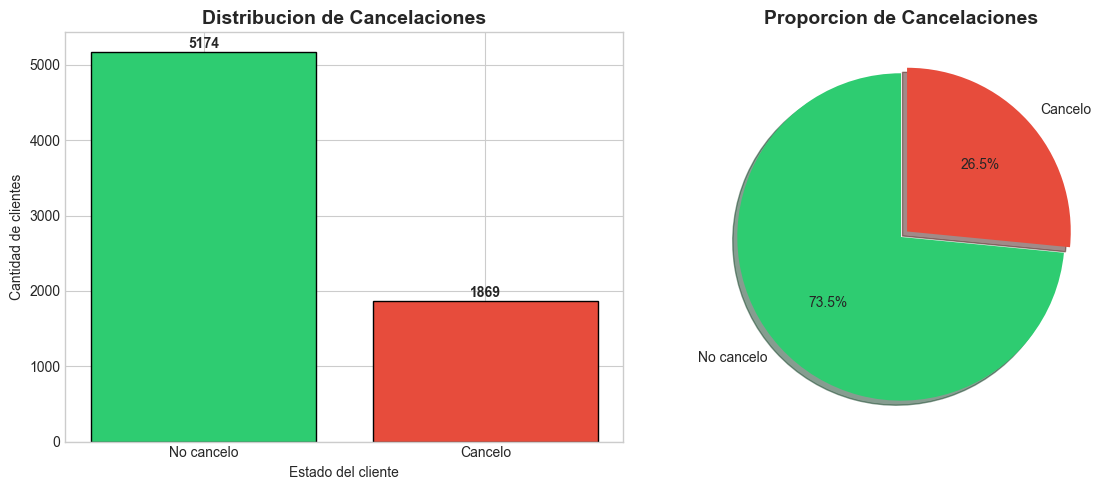


ESTADISTICAS DE CANCELACION
Total de clientes: 7267
Clientes que permanecen: 5174 (71.2%)
Clientes que cancelaron: 1869 (25.7%)


In [13]:
# ============================================
# 3.2 Distribucion de la variable Churn (Cancelacion)
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico de barras
conteo_churn = df_limpio['cancelacion'].value_counts()
etiquetas = ['No cancelo', 'Cancelo']
colores = ['#2ecc71', '#e74c3c']

axes[0].bar(etiquetas, conteo_churn.values, color=colores, edgecolor='black')
axes[0].set_title('Distribucion de Cancelaciones', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Estado del cliente')
axes[0].set_ylabel('Cantidad de clientes')
for i, v in enumerate(conteo_churn.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Grafico de pastel
axes[1].pie(conteo_churn.values, labels=etiquetas, autopct='%1.1f%%', colors=colores,
            explode=(0, 0.05), shadow=True, startangle=90)
axes[1].set_title('Proporcion de Cancelaciones', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Estadisticas
print("\nESTADISTICAS DE CANCELACION")
print("=" * 40)
total = len(df_limpio)
cancelados = conteo_churn[1]
no_cancelados = conteo_churn[0]
print(f"Total de clientes: {total}")
print(f"Clientes que permanecen: {no_cancelados} ({no_cancelados/total*100:.1f}%)")
print(f"Clientes que cancelaron: {cancelados} ({cancelados/total*100:.1f}%)")

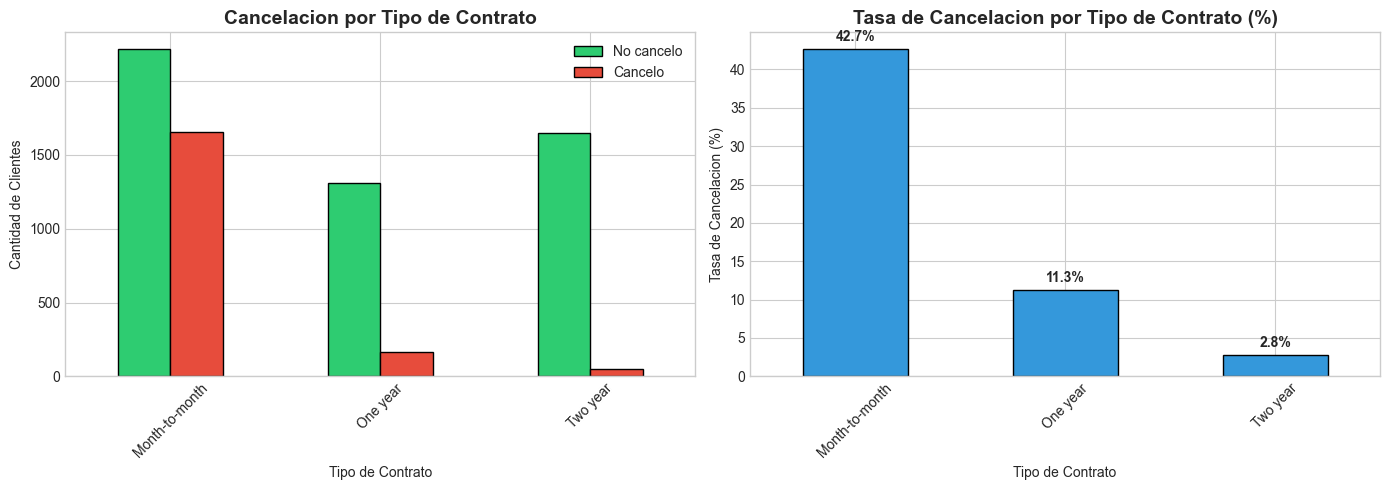


TASA DE CANCELACION POR TIPO DE CONTRATO
Month-to-month: 42.7%
One year: 11.3%
Two year: 2.8%


In [14]:
# ============================================
# 3.3 Analisis de cancelacion por tipo de contrato
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cancelacion por tipo de contrato
contrato_churn = df_limpio.groupby(['tipo_contrato', 'cancelacion']).size().unstack(fill_value=0)
contrato_churn.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0].set_title('Cancelacion por Tipo de Contrato', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].legend(['No cancelo', 'Cancelo'])
axes[0].tick_params(axis='x', rotation=45)

# Tasa de cancelacion por tipo de contrato
tasa_contrato = df_limpio.groupby('tipo_contrato')['cancelacion'].mean() * 100
tasa_contrato.plot(kind='bar', ax=axes[1], color='#3498db', edgecolor='black')
axes[1].set_title('Tasa de Cancelacion por Tipo de Contrato (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tipo de Contrato')
axes[1].set_ylabel('Tasa de Cancelacion (%)')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(tasa_contrato.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTASA DE CANCELACION POR TIPO DE CONTRATO")
print("=" * 45)
for contrato, tasa in tasa_contrato.items():
    print(f"{contrato}: {tasa:.1f}%")

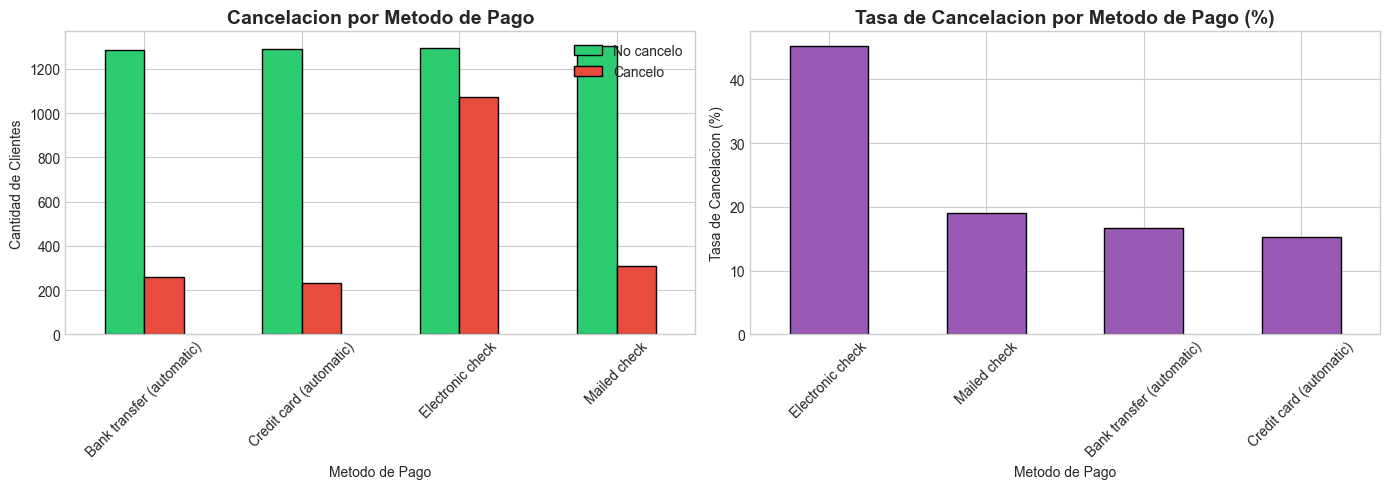


TASA DE CANCELACION POR METODO DE PAGO
Electronic check: 45.3%
Mailed check: 19.1%
Bank transfer (automatic): 16.7%
Credit card (automatic): 15.2%


In [15]:
# ============================================
# 3.4 Analisis de cancelacion por metodo de pago
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cancelacion por metodo de pago
pago_churn = df_limpio.groupby(['metodo_pago', 'cancelacion']).size().unstack(fill_value=0)
pago_churn.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0].set_title('Cancelacion por Metodo de Pago', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Metodo de Pago')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].legend(['No cancelo', 'Cancelo'])
axes[0].tick_params(axis='x', rotation=45)

# Tasa de cancelacion por metodo de pago
tasa_pago = df_limpio.groupby('metodo_pago')['cancelacion'].mean() * 100
tasa_pago.sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='#9b59b6', edgecolor='black')
axes[1].set_title('Tasa de Cancelacion por Metodo de Pago (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Metodo de Pago')
axes[1].set_ylabel('Tasa de Cancelacion (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nTASA DE CANCELACION POR METODO DE PAGO")
print("=" * 45)
for pago, tasa in tasa_pago.sort_values(ascending=False).items():
    print(f"{pago}: {tasa:.1f}%")

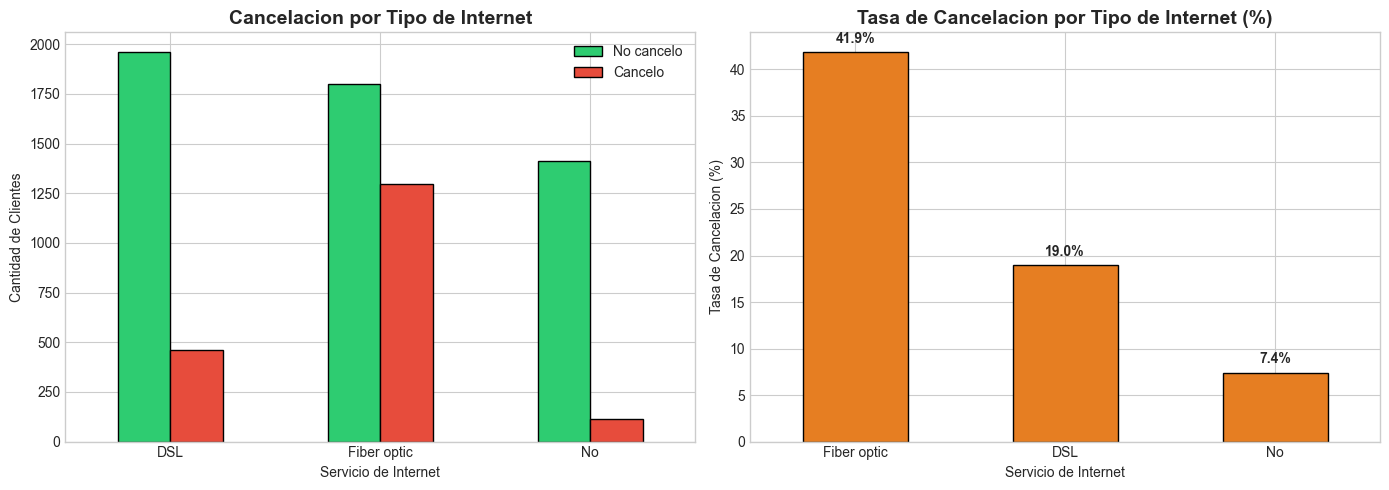


TASA DE CANCELACION POR SERVICIO DE INTERNET
Fiber optic: 41.9%
DSL: 19.0%
No: 7.4%


In [16]:
# ============================================
# 3.5 Analisis de cancelacion por servicio de internet
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cancelacion por servicio de internet
internet_churn = df_limpio.groupby(['servicio_internet', 'cancelacion']).size().unstack(fill_value=0)
internet_churn.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0].set_title('Cancelacion por Tipo de Internet', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Servicio de Internet')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].legend(['No cancelo', 'Cancelo'])
axes[0].tick_params(axis='x', rotation=0)

# Tasa de cancelacion por servicio de internet
tasa_internet = df_limpio.groupby('servicio_internet')['cancelacion'].mean() * 100
tasa_internet.sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='#e67e22', edgecolor='black')
axes[1].set_title('Tasa de Cancelacion por Tipo de Internet (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Servicio de Internet')
axes[1].set_ylabel('Tasa de Cancelacion (%)')
axes[1].tick_params(axis='x', rotation=0)
for i, v in enumerate(tasa_internet.sort_values(ascending=False).values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTASA DE CANCELACION POR SERVICIO DE INTERNET")
print("=" * 45)
for internet, tasa in tasa_internet.sort_values(ascending=False).items():
    print(f"{internet}: {tasa:.1f}%")

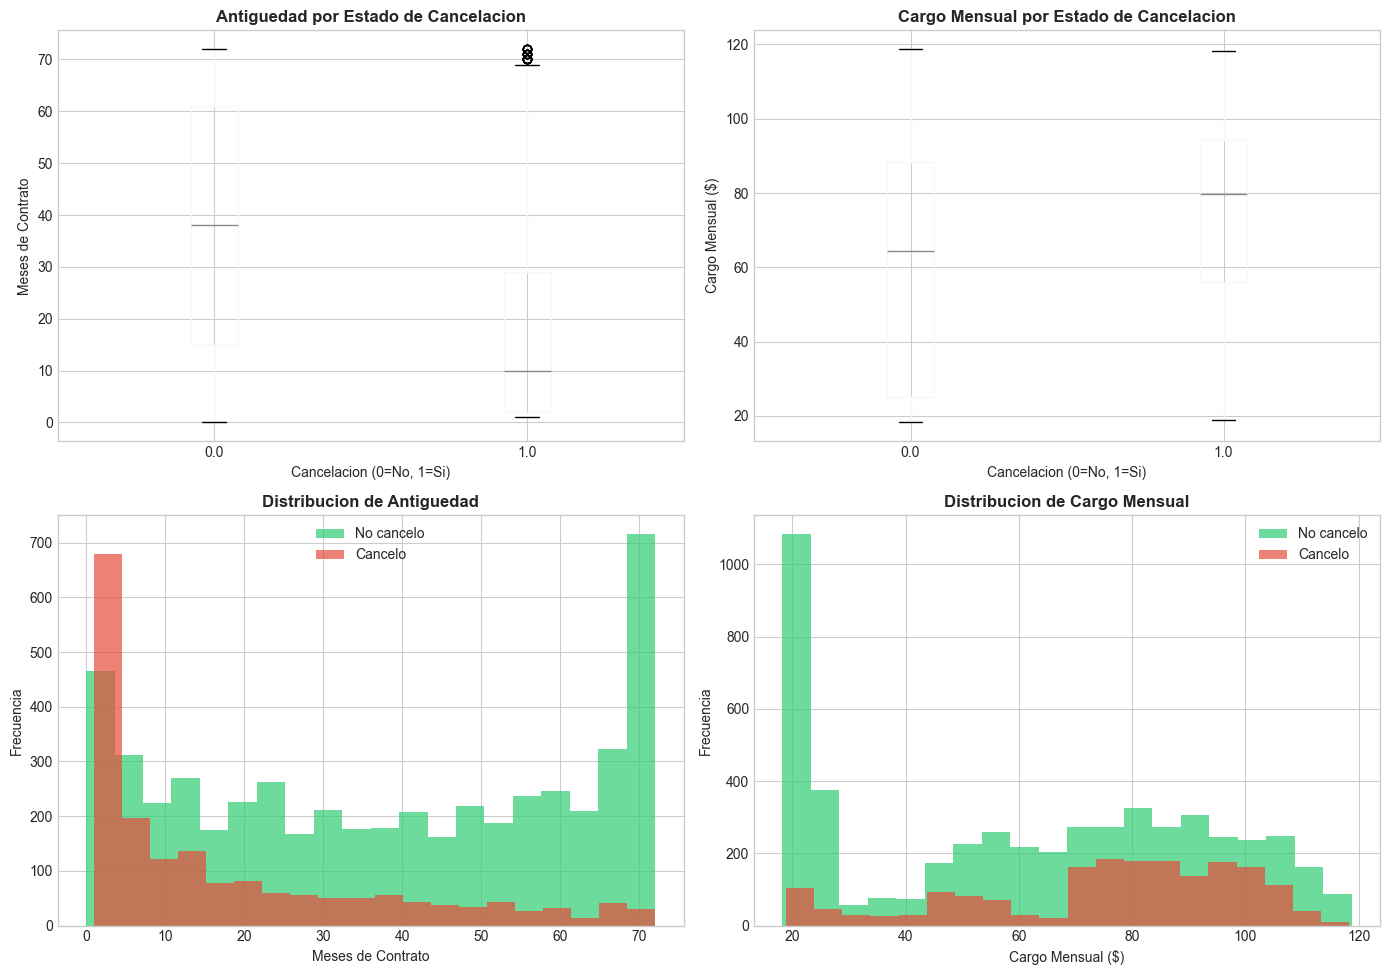


COMPARATIVA DE METRICAS POR ESTADO DE CANCELACION
            meses_contrato  cargo_mensual  cargo_total
No cancelo           37.57          61.27      2552.87
Cancelo              17.98          74.44      1531.80


In [17]:
# ============================================
# 3.6 Analisis de cancelacion por antiguedad y cargos
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribucion de antiguedad por cancelacion
df_limpio.boxplot(column='meses_contrato', by='cancelacion', ax=axes[0, 0])
axes[0, 0].set_title('Antiguedad por Estado de Cancelacion', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Cancelacion (0=No, 1=Si)')
axes[0, 0].set_ylabel('Meses de Contrato')
plt.suptitle('')

# Distribucion de cargo mensual por cancelacion
df_limpio.boxplot(column='cargo_mensual', by='cancelacion', ax=axes[0, 1])
axes[0, 1].set_title('Cargo Mensual por Estado de Cancelacion', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Cancelacion (0=No, 1=Si)')
axes[0, 1].set_ylabel('Cargo Mensual ($)')
plt.suptitle('')

# Histograma de antiguedad
df_limpio[df_limpio['cancelacion']==0]['meses_contrato'].hist(ax=axes[1, 0], alpha=0.7, label='No cancelo', color='#2ecc71', bins=20)
df_limpio[df_limpio['cancelacion']==1]['meses_contrato'].hist(ax=axes[1, 0], alpha=0.7, label='Cancelo', color='#e74c3c', bins=20)
axes[1, 0].set_title('Distribucion de Antiguedad', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Meses de Contrato')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()

# Histograma de cargo mensual
df_limpio[df_limpio['cancelacion']==0]['cargo_mensual'].hist(ax=axes[1, 1], alpha=0.7, label='No cancelo', color='#2ecc71', bins=20)
df_limpio[df_limpio['cancelacion']==1]['cargo_mensual'].hist(ax=axes[1, 1], alpha=0.7, label='Cancelo', color='#e74c3c', bins=20)
axes[1, 1].set_title('Distribucion de Cargo Mensual', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Cargo Mensual ($)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Estadisticas comparativas
print("\nCOMPARATIVA DE METRICAS POR ESTADO DE CANCELACION")
print("=" * 55)
comparativa = df_limpio.groupby('cancelacion')[['meses_contrato', 'cargo_mensual', 'cargo_total']].mean()
comparativa.index = ['No cancelo', 'Cancelo']
print(comparativa.round(2))

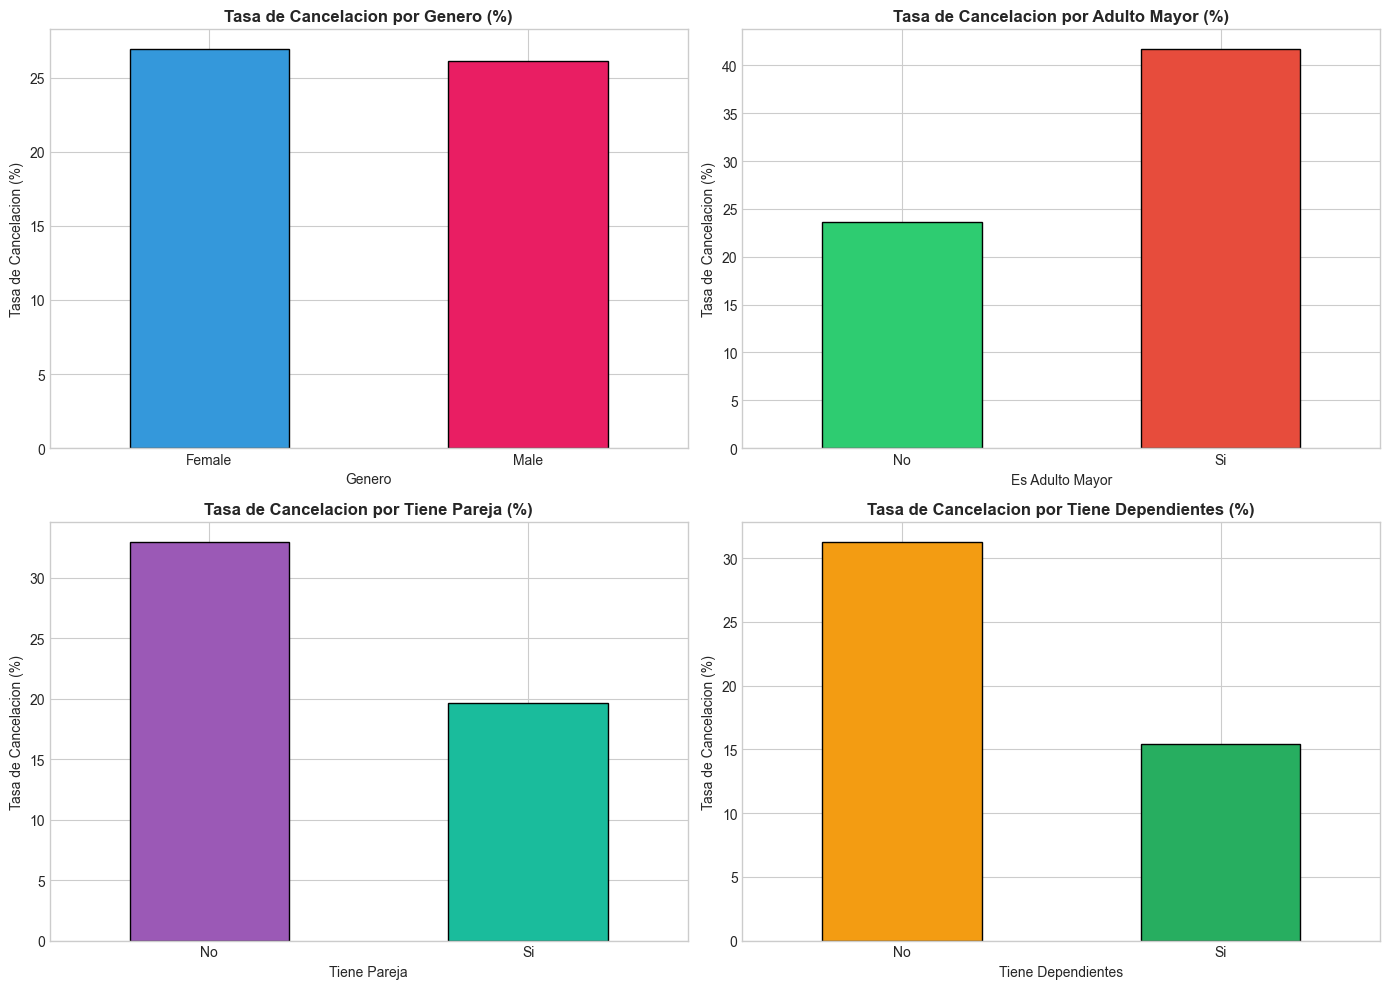


RESUMEN DE TASAS DE CANCELACION POR VARIABLES DEMOGRAFICAS
Por genero - Female: 26.9%, Male: 26.2%
Adultos mayores: Si: 41.7%, No: 23.6%
Con pareja: Si: 19.7%, No: 33.0%
Con dependientes: Si: 15.5%, No: 31.3%


In [18]:
# ============================================
# 3.7 Analisis de cancelacion por variables demograficas
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Por genero
tasa_genero = df_limpio.groupby('genero')['cancelacion'].mean() * 100
tasa_genero.plot(kind='bar', ax=axes[0, 0], color=['#3498db', '#e91e63'], edgecolor='black')
axes[0, 0].set_title('Tasa de Cancelacion por Genero (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Genero')
axes[0, 0].set_ylabel('Tasa de Cancelacion (%)')
axes[0, 0].tick_params(axis='x', rotation=0)

# Por adulto mayor
tasa_senior = df_limpio.groupby('es_adulto_mayor')['cancelacion'].mean() * 100
tasa_senior.index = ['No', 'Si']
tasa_senior.plot(kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0, 1].set_title('Tasa de Cancelacion por Adulto Mayor (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Es Adulto Mayor')
axes[0, 1].set_ylabel('Tasa de Cancelacion (%)')
axes[0, 1].tick_params(axis='x', rotation=0)

# Por pareja
tasa_pareja = df_limpio.groupby('tiene_pareja')['cancelacion'].mean() * 100
tasa_pareja.index = ['No', 'Si']
tasa_pareja.plot(kind='bar', ax=axes[1, 0], color=['#9b59b6', '#1abc9c'], edgecolor='black')
axes[1, 0].set_title('Tasa de Cancelacion por Tiene Pareja (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Tiene Pareja')
axes[1, 0].set_ylabel('Tasa de Cancelacion (%)')
axes[1, 0].tick_params(axis='x', rotation=0)

# Por dependientes
tasa_dependientes = df_limpio.groupby('tiene_dependientes')['cancelacion'].mean() * 100
tasa_dependientes.index = ['No', 'Si']
tasa_dependientes.plot(kind='bar', ax=axes[1, 1], color=['#f39c12', '#27ae60'], edgecolor='black')
axes[1, 1].set_title('Tasa de Cancelacion por Tiene Dependientes (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tiene Dependientes')
axes[1, 1].set_ylabel('Tasa de Cancelacion (%)')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nRESUMEN DE TASAS DE CANCELACION POR VARIABLES DEMOGRAFICAS")
print("=" * 55)
print(f"Por genero - Female: {tasa_genero['Female']:.1f}%, Male: {tasa_genero['Male']:.1f}%")
print(f"Adultos mayores: Si: {tasa_senior['Si']:.1f}%, No: {tasa_senior['No']:.1f}%")
print(f"Con pareja: Si: {tasa_pareja['Si']:.1f}%, No: {tasa_pareja['No']:.1f}%")
print(f"Con dependientes: Si: {tasa_dependientes['Si']:.1f}%, No: {tasa_dependientes['No']:.1f}%")

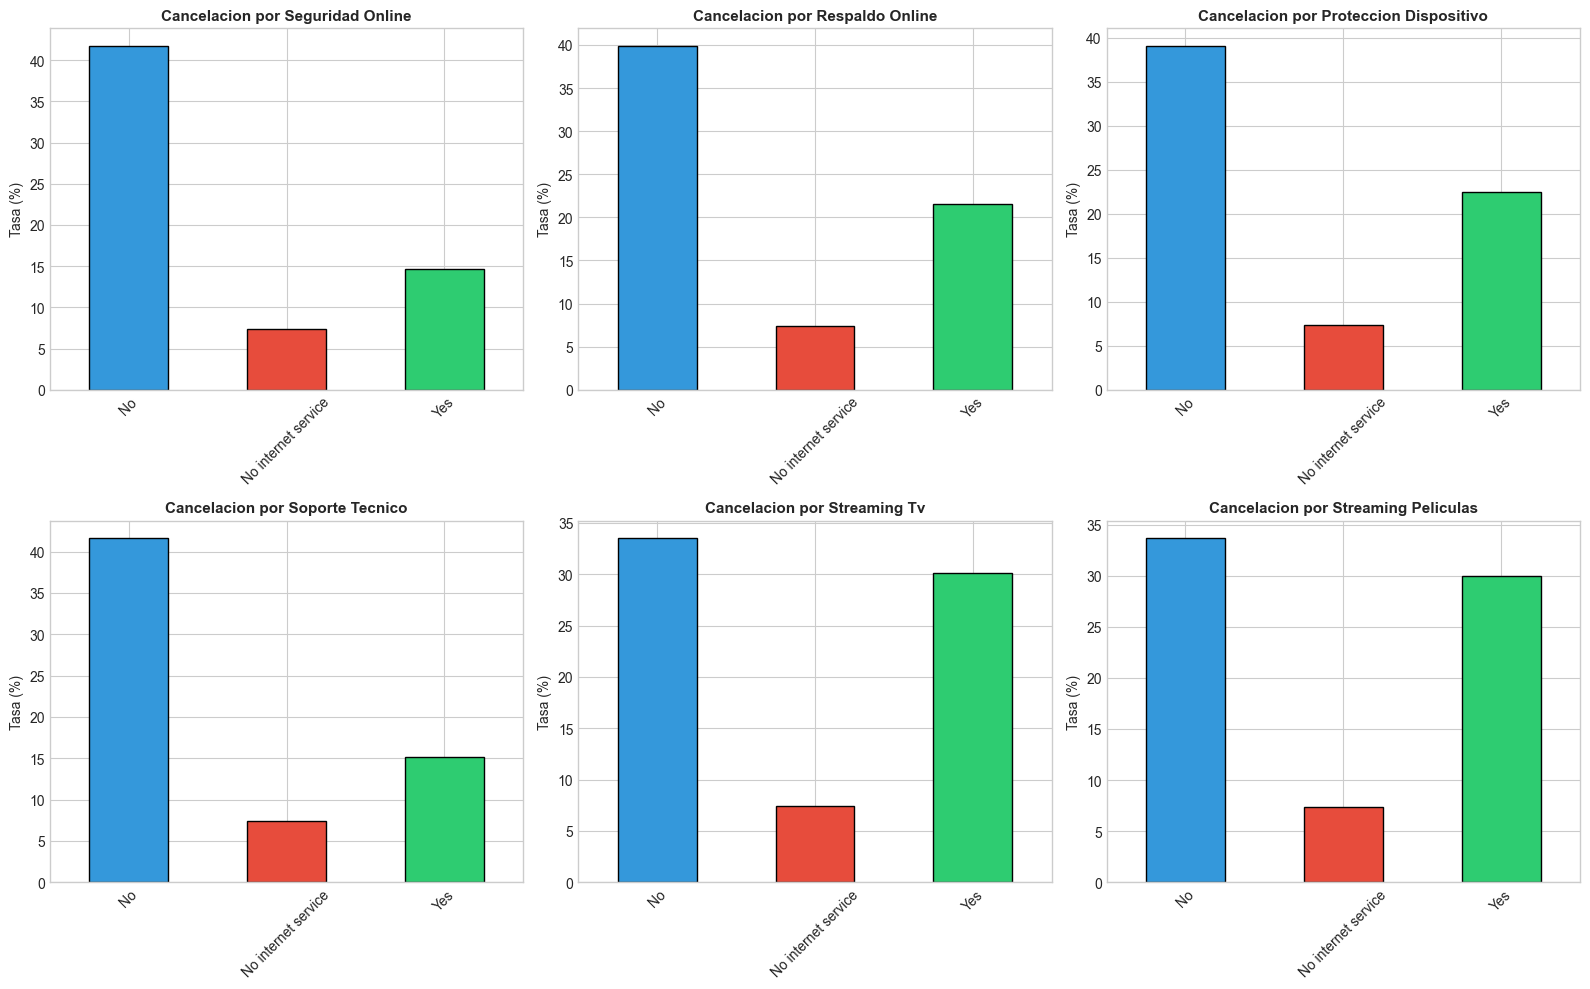


IMPACTO DE SERVICIOS ADICIONALES EN LA CANCELACION

SEGURIDAD ONLINE:
  No: 41.8%
  No internet service: 7.4%
  Yes: 14.6%

RESPALDO ONLINE:
  No: 39.9%
  No internet service: 7.4%
  Yes: 21.5%

PROTECCION DISPOSITIVO:
  No: 39.1%
  No internet service: 7.4%
  Yes: 22.5%

SOPORTE TECNICO:
  No: 41.6%
  No internet service: 7.4%
  Yes: 15.2%

STREAMING TV:
  No: 33.5%
  No internet service: 7.4%
  Yes: 30.1%

STREAMING PELICULAS:
  No: 33.7%
  No internet service: 7.4%
  Yes: 29.9%


In [19]:
# ============================================
# 3.8 Analisis de servicios adicionales y cancelacion
# ============================================

servicios = ['seguridad_online', 'respaldo_online', 'proteccion_dispositivo', 
             'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, servicio in enumerate(servicios):
    tasa_servicio = df_limpio.groupby(servicio)['cancelacion'].mean() * 100
    tasa_servicio.plot(kind='bar', ax=axes[i], color=['#3498db', '#e74c3c', '#2ecc71'], edgecolor='black')
    axes[i].set_title(f'Cancelacion por {servicio.replace("_", " ").title()}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Tasa (%)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Resumen de servicios
print("\nIMPACTO DE SERVICIOS ADICIONALES EN LA CANCELACION")
print("=" * 55)
for servicio in servicios:
    tasa = df_limpio.groupby(servicio)['cancelacion'].mean() * 100
    print(f"\n{servicio.replace('_', ' ').upper()}:")
    for categoria, valor in tasa.items():
        print(f"  {categoria}: {valor:.1f}%")

#📄Informe final

# INFORME FINAL: Analisis de Evasion de Clientes - Telecom X

---

## 1. INTRODUCCION

### Objetivo del Analisis
Este informe presenta los resultados del analisis exploratorio de datos (EDA) realizado sobre la base de clientes de Telecom X, con el objetivo de identificar los factores que influyen en la evasion de clientes (Churn).

### Problema de Negocio
Telecom X enfrenta una alta tasa de cancelaciones de servicio. Comprender los patrones de comportamiento de los clientes que cancelan permite:
- Identificar clientes en riesgo de cancelar
- Desarrollar estrategias de retencion
- Optimizar la oferta de servicios
- Reducir costos asociados a la perdida de clientes

---

## 2. LIMPIEZA Y TRATAMIENTO DE DATOS

### 2.1 Extraccion de Datos
- **Fuente**: Archivo JSON (TelecomX_Data.json)
- **Registros originales**: 7,267 clientes
- **Variables**: 21 columnas con informacion demografica, de servicios y facturacion

### 2.2 Transformaciones Realizadas
1. **Normalizacion de estructura JSON**: Se aplanaron los datos anidados (customer, phone, internet, account)
2. **Conversion de tipos de datos**: La columna de cargos totales se convirtio de texto a numerico
3. **Tratamiento de valores nulos**: Se rellenaron con la mediana
4. **Eliminacion de duplicados**: Se verifico y elimino registros duplicados
5. **Creacion de nueva variable**: Se calculo el cargo diario (cargo_mensual / 30)
6. **Estandarizacion de nombres**: Se tradujeron las columnas al espanol
7. **Codificacion binaria**: Se convirtieron variables Yes/No a 1/0

## 3. ANALISIS EXPLORATORIO DE DATOS

### 3.1 Distribucion General del Churn
- La tasa de cancelacion general es de aproximadamente **26.5%**
- De cada 4 clientes, aproximadamente 1 cancela el servicio

### 3.2 Hallazgos por Tipo de Contrato
| Tipo de Contrato | Tasa de Cancelacion |
|------------------|---------------------|
| Mes a mes        | ~42%                |
| Un ano           | ~11%                |
| Dos anos         | ~3%                 |

**Insight**: Los contratos mensuales tienen una tasa de cancelacion 4 veces mayor que los anuales.

### 3.3 Hallazgos por Metodo de Pago
- **Cheque electronico**: Mayor tasa de cancelacion (~45%)
- **Metodos automaticos** (tarjeta, transferencia): Menor tasa (~15-18%)

### 3.4 Hallazgos por Tipo de Internet
- **Fibra optica**: Mayor tasa de cancelacion (~42%)
- **DSL**: Tasa moderada (~19%)
- **Sin internet**: Tasa baja (~7%)

### 3.5 Hallazgos por Antiguedad
- Clientes que cancelan tienen en promedio **18 meses** de antiguedad
- Clientes que permanecen tienen en promedio **37 meses** de antiguedad
- **Mayor riesgo**: Primeros 12 meses de contrato

### 3.6 Hallazgos Demograficos
- **Adultos mayores**: Mayor tasa de cancelacion (41% vs 24%)
- **Sin pareja**: Mayor tasa de cancelacion (33% vs 20%)
- **Sin dependientes**: Mayor tasa de cancelacion (31% vs 15%)
- **Genero**: No hay diferencia significativa

### 3.7 Impacto de Servicios Adicionales
Los clientes SIN estos servicios tienen mayor probabilidad de cancelar:
- Seguridad online
- Respaldo online
- Soporte tecnico
- Proteccion de dispositivo

## 4. CONCLUSIONES E INSIGHTS

### Factores de Mayor Riesgo de Cancelacion
1. **Contrato mes a mes**: El factor mas determinante (42% de cancelacion)
2. **Pago con cheque electronico**: Asociado a baja fidelizacion
3. **Clientes nuevos**: Los primeros 12 meses son criticos
4. **Sin servicios adicionales**: Menor engagement con la empresa
5. **Fibra optica**: Posibles problemas de calidad o precio
6. **Adultos mayores solos**: Segmento vulnerable

### Perfil del Cliente en Riesgo
- Contrato mensual
- Menos de 12 meses de antiguedad
- Paga con cheque electronico
- Tiene fibra optica
- No tiene servicios adicionales (seguridad, soporte)
- Adulto mayor sin pareja ni dependientes

### Perfil del Cliente Leal
- Contrato de 1 o 2 anos
- Mas de 24 meses de antiguedad
- Pago automatico (tarjeta o transferencia)
- Tiene multiples servicios contratados
- Tiene pareja y/o dependientes

## 5. RECOMENDACIONES ESTRATEGICAS

### 5.1 Estrategias de Retencion Inmediata
1. **Programa de fidelizacion para nuevos clientes**: Incentivos durante los primeros 12 meses
2. **Migracion a contratos anuales**: Ofrecer descuentos por compromiso de permanencia
3. **Promocion de pago automatico**: Descuento por domiciliacion bancaria

### 5.2 Mejora de Servicios
1. **Revisar calidad de fibra optica**: Investigar causas de insatisfaccion
2. **Paquetes de servicios adicionales**: Ofrecer bundles con seguridad y soporte
3. **Atencion especial a adultos mayores**: Soporte tecnico personalizado

### 5.3 Acciones de Marketing
1. **Segmentacion de clientes en riesgo**: Crear campanas personalizadas
2. **Programa de referidos**: Incentivar a clientes leales
3. **Encuestas de satisfaccion**: Detectar problemas antes de la cancelacion

### 5.4 Proximos Pasos - Data Science
1. **Modelo predictivo de churn**: Usar machine learning para predecir cancelaciones
2. **Analisis de lifetime value**: Calcular el valor de cada cliente
3. **A/B testing**: Probar estrategias de retencion
4. **Analisis de cohortes**: Seguimiento por periodo de adquisicion

---

**Elaborado por**: Vinsmake
**Fecha**: Diciembre 2025